In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
import seaborn as sns

In [2]:
cd E:\Data Sci\Machince_Langauage\Ass

E:\Data Sci\Machince_Langauage\Ass


In [4]:
#Part-1

In [5]:
#Q-1
data = pd.read_csv("Ass-1.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [6]:
#Q-2
data['experience'] = data.replace(np.NAN,0)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [16]:
#Q-3
test = data['test_score(out of 10)'].loc[data['test_score(out of 10)'] != np.NAN]
mean = test.astype(float).mean()
data['test_score(out of 10)'] = data['test_score(out of 10)'].replace(np.NAN,mean).astype(float)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


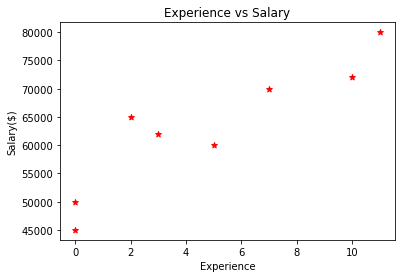

In [7]:
#Q-4
plt.xlabel('Experience')
plt.ylabel('Salary($)')
plt.title('Experience vs Salary')
ex = data['experience']
sal = data['salary($)']
plt.scatter(ex,sal,color = 'red' , marker = '*')
plt.show()

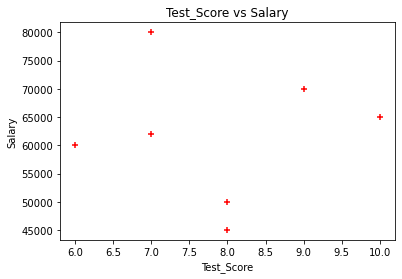

In [8]:
#Q-5
plt.xlabel('Test_Score')
plt.ylabel('Salary')
plt.title('Test_Score vs Salary')
test = data['test_score(out of 10)']
sal = data['salary($)']
plt.scatter(test,sal,color = 'red',marker = '+')
plt.show()

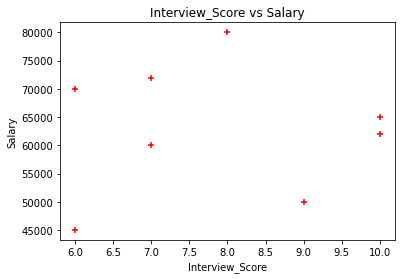

In [9]:
#Q-6
plt.xlabel('Interview_Score')
plt.ylabel('Salary')
plt.title('Interview_Score vs Salary')
intw = data['interview_score(out of 10)']
sal = data['salary($)']
plt.scatter(intw,sal,color = 'red',marker = '+')
plt.show()

<AxesSubplot:xlabel='experience', ylabel='count'>

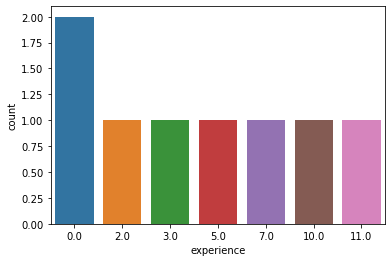

In [10]:
#Q-7
sns.countplot(x="experience", data=data)

In [ ]:
#Part-2
#Data Spliting

In [11]:
data1 = data.dropna(axis = 0)
data1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
7,11.0,7.0,8,80000


In [13]:
#Q-1
y = data1['salary($)']
print(y)
x = data1.drop('salary($)',axis='columns')
print(x)

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
7    80000
Name: salary($), dtype: int64
   experience  test_score(out of 10)  interview_score(out of 10)
0         0.0                    8.0                           9
1         0.0                    8.0                           6
2         5.0                    6.0                           7
3         2.0                   10.0                          10
4         7.0                    9.0                           6
5         3.0                    7.0                          10
7        11.0                    7.0                           8


In [14]:
#Q-2
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
print("Shape:- ",X_train.shape)
X_train

Shape:-  (5, 3)


,experience,test_score(out of 10),interview_score(out of 10)
0,0.0,8.0,9
3,2.0,10.0,10
4,7.0,9.0,6
5,3.0,7.0,10
1,0.0,8.0,6


In [16]:
print("Shape:- ",X_test.shape)
X_test

Shape:-  (2, 3)


,experience,test_score(out of 10),interview_score(out of 10)
2,5.0,6.0,7
7,11.0,7.0,8


In [17]:
print("Shape:- ",Y_train.shape)
Y_train

Shape:-  (5,)


0    50000
3    65000
4    70000
5    62000
1    45000
Name: salary($), dtype: int64

In [18]:
print("Shape:- ",Y_test.shape)
Y_test

Shape:-  (2,)


2    60000
7    80000
Name: salary($), dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression_model1=LinearRegression()
regression_model1.fit(X_train,Y_train)

LinearRegression()

In [21]:
#Q-3
#Its used for overfitting
print("Traning Score:- ",regression_model1.score(X_train,Y_train))
print("Testing Score:- ",regression_model1.score(X_test,Y_test))

Traning Score:-  0.9946917756111061
Testing Score:-  0.9115129724723761


In [22]:
Predicted_sal = regression_model1.predict(X_test)
Predicted_sal

array([59322.98923369, 84151.9949335 ])

In [23]:
Y_test

2    60000
7    80000
Name: salary($), dtype: int64

In [24]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

In [25]:
mse=mean_squared_error(Y_test,Predicted_sal)
r2 = r2_score(Y_test,Predicted_sal) 
mae = mean_absolute_error(Y_test,Predicted_sal)
rmse = math.sqrt(mse)

In [26]:
#Q-4
print('Slope:' ,regression_model1.coef_) 
print('Intercept:', regression_model1.intercept_)

Slope: [3398.98670044 2160.2279924  2274.85750475]
Intercept: 13442.685243825239


In [27]:
#Q-5
print('Mean Squared Error:- ',mse)

Mean Squared Error:-  8848702.752762396


In [28]:
#Q-6
print('Mean Absolute Error:- ',mae)

Mean Absolute Error:-  2414.502849905002


In [29]:
#Q-7
print("Root of Mean Squared Error:- ",rmse)

Root of Mean Squared Error:-  2974.676915693937


In [30]:
#Q-8
print("R2 Score:- ",r2)

R2 Score:-  0.9115129724723761
